Wi-Fi 신호로 현재위치 및 빌딩 추측
=====

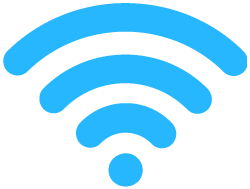

- ### 분석자: 박지훈
- ### 분석기간: 2017.08.10
- ### 사용자료: UJIIndoorLoc Data Set
- ### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
- ### 분석방법: OLS(Ordinary Least Square), QDA(Quadratic Discriminant Analysis), K-Neighbors Regression

---

### 패키지 불러오기

In [1]:
# import packages
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize

### 데이터 불러오기

In [2]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

In [187]:
raw_train.head(n=10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


In [186]:
raw_validation.head(n=10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


### EDA(탐색적 시각화)
랜덤으로 칼럼을 추출하여 데이터 분포양상 확인

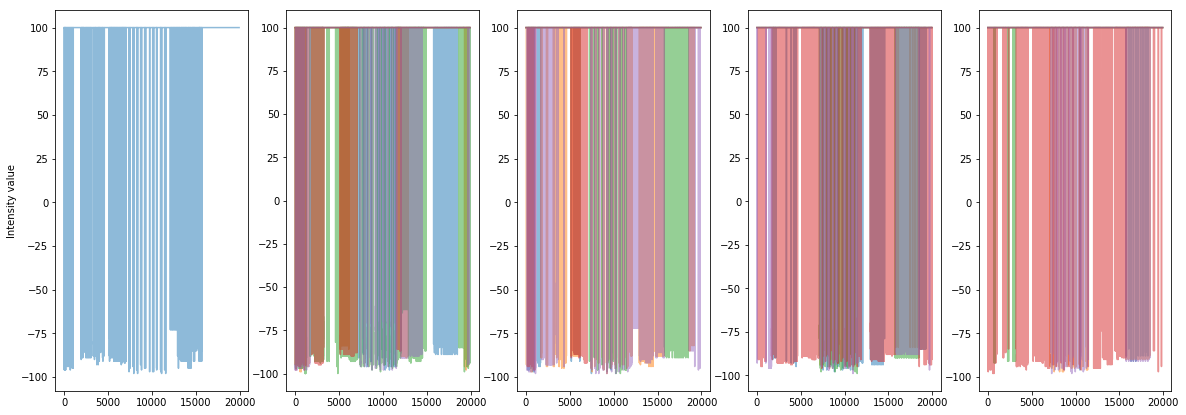

In [233]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 5, 1)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 1)], alpha=0.5)
plt.ylabel("Intensity value")
plt.subplot(1, 5, 2)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 3)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 4)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 5)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.show()

Wi-Fi신호 세기 범위

In [68]:
print("Max_value:{:.2f}".format(raw_train.iloc[:, :519].values.max()), ",", "Min_value:{:.2f}".format(raw_train.iloc[:, :519].values.min()))

Max_value:100.00 , Min_value:-104.00


In [36]:
raw_train.describe().iloc[:, :520]

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,84.974921,99.866881,98.881276,98.833325,99.436525,73.705673,59.889803,99.788634,99.970507,100.0
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,50.099899,5.023663,14.206023,14.634613,10.259137,62.278292,74.060259,6.360671,2.404232,0.0
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,-103.000000,-97.000000,-92.000000,-90.000000,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,100.0
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0


### 변수 정규화

In [235]:
scale(raw_train.iloc[:, :520])

array([[ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       ..., 
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ],
       [ 0.03006045,  0.0308837 ,  0.        , ...,  0.03323095,
         0.01226739,  0.        ]])

In [237]:
normalize(raw_train.iloc[:, :520])

array([[ 0.04412907,  0.04412907,  0.04412907, ...,  0.04412907,
         0.04412907,  0.04412907],
       [ 0.04411699,  0.04411699,  0.04411699, ...,  0.04411699,
         0.04411699,  0.04411699],
       [ 0.0440411 ,  0.0440411 ,  0.0440411 , ...,  0.0440411 ,
         0.0440411 ,  0.0440411 ],
       ..., 
       [ 0.04388709,  0.04388709,  0.04388709, ...,  0.04388709,
         0.04388709,  0.04388709],
       [ 0.04403871,  0.04403871,  0.04403871, ...,  0.04403871,
         0.04403871,  0.04403871],
       [ 0.04402676,  0.04402676,  0.04402676, ...,  0.04402676,
         0.04402676,  0.04402676]])

In [7]:
scale_train = pd.DataFrame(scale(raw_train.iloc[:, :520]), columns=raw_train.columns[:520])
scale_validation = pd.DataFrame(scale(raw_validation.iloc[:, :520]), columns=raw_validation.columns[:520])

nor_train = pd.DataFrame(normalize(raw_train.iloc[:, :520]), columns=raw_train.columns[:520])
nor_validation = pd.DataFrame(normalize(raw_validation.iloc[:, :520]), columns=raw_validation.columns[:520])

In [8]:
scale_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
1,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
2,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
3,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
4,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015


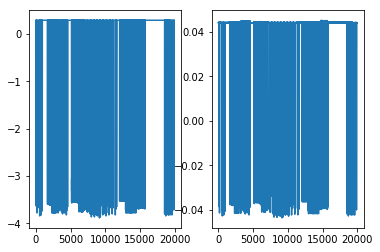

In [34]:
plt.subplot(1, 2, 1)
plt.plot(scale_train.iloc[:, 112])
plt.subplot(1, 2, 2)
plt.plot(nor_train.iloc[:, 112])
plt.show()

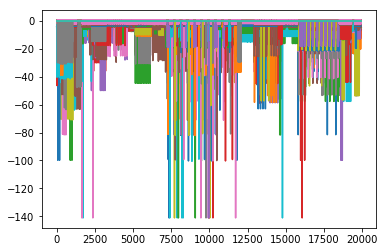

In [10]:
plt.plot(scale(raw_train.iloc[:, :520]))
plt.show()

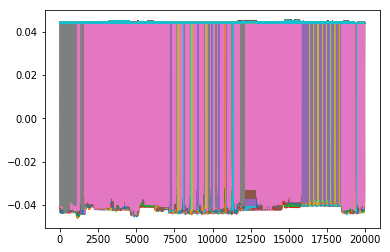

In [11]:
plt.plot(normalize(raw_train.iloc[:, :520]))
plt.show()

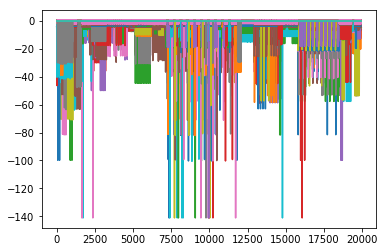

In [12]:
plt.plot(scale_train.iloc[:, :])
plt.show()

### One-Hot-Encoding
층 수, 빌딩 번호는 명목변수이기 때문에 정수 표현을 위해서는 One-Hot-Encoding이 필요

In [77]:
OHE = OneHotEncoder(dtype=int)
OHE_fit = OHE.fit(raw_train.iloc[:, [522, 523, 527]])

train_ohe = pd.DataFrame(OHE_fit.transform(raw_train.iloc[:, [522, 523, 527]]).toarray())
train_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [78]:
validation_ohe = pd.DataFrame(OHE_fit.transform(raw_validation.iloc[:, [522, 523, 527]]).toarray())
validation_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 데이터 병합
One-Hot-Encoding 한 데이터를 정규화시킨 데이터와 병합 

In [74]:
train_x = nor_train.join(train_ohe)

In [75]:
train_y = raw_train.iloc[:, 520:522]

In [76]:
validation_x = nor_validation.join(validation_ohe)

### K-Neighbors Regression

In [79]:
model_KN = KNeighborsRegressor(n_neighbors=3).fit(train_x, train_y)
predic_y = model_KN.predict(validation_x)

# predic_y, raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

In [80]:
gap = predic_y-raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]
print("Gap\n{}".format(np.mean(gap)), "\n\nVariance\n{}".format(np.var(gap)))

Gap
LONGITUDE    0.879295
LATITUDE     5.600084
dtype: float64 

Variance
LONGITUDE    522.284294
LATITUDE     402.504061
dtype: float64


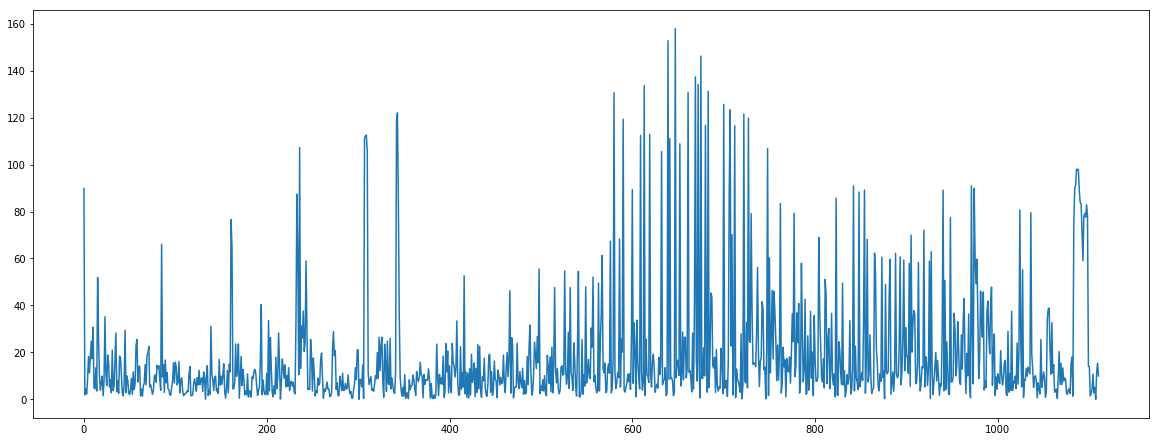

In [145]:
raw_gap = raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]
pre_gap = pd.DataFrame(predic_y, columns=["LONGITUDE", "LATITUDE"])
plt.figure(figsize=(20, 7.5))
plt.plot(np.sqrt(np.sum((raw_gap-pre_gap)*(raw_gap-pre_gap), axis=1)))
plt.show()

In [89]:
np.mean(np.sqrt(np.sum((raw_gap-pre_gap)*(raw_gap-pre_gap), axis=1)))

18.412698575739167

In [90]:
gap.head()

,LONGITUDE,LATITUDE
0,88.805411,13.467365
1,-1.659179,-0.781307
2,4.291380,1.219778
3,0.774283,2.172546
4,-6.388864,5.393706


### K-Neighbers Regression 시각화

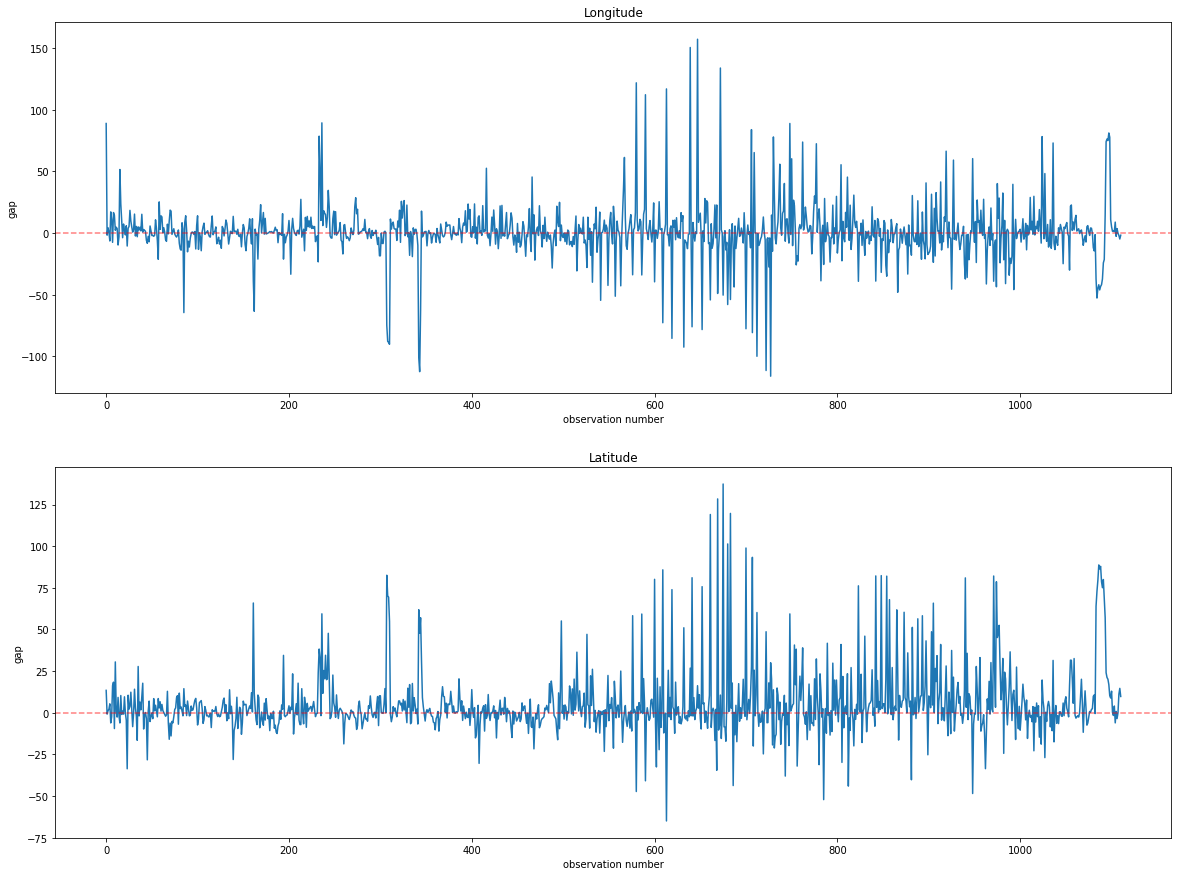

In [118]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.plot(gap.iloc[:,0])
plt.axhline(0, c="red", alpha=0.5, linestyle="--")
plt.title("Longitude")
plt.xlabel("observation number")
plt.ylabel("gap")
plt.subplot(2, 1, 2)
plt.plot(gap.iloc[:,1])
plt.axhline(0, c="red", alpha=0.5, linestyle="dashed")
plt.title("Latitude")
plt.xlabel("observation number")
plt.ylabel("gap")
plt.show()

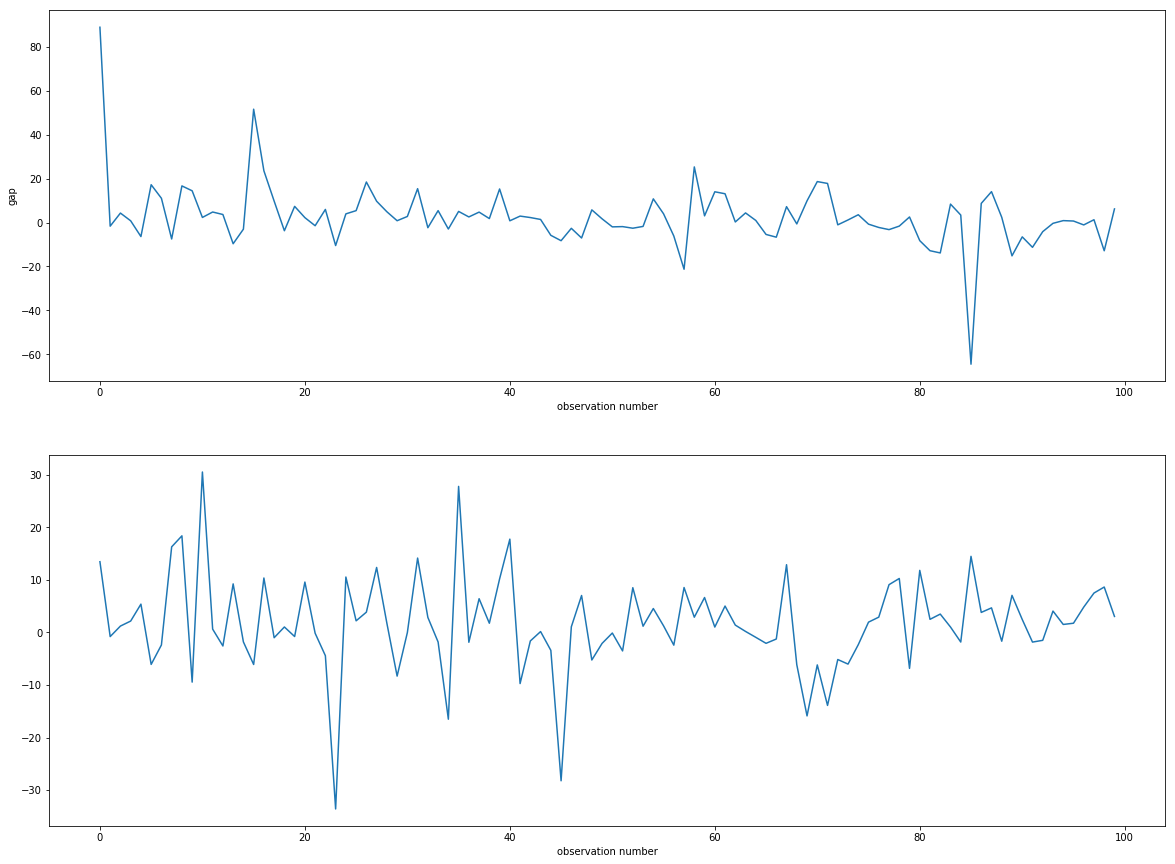

In [141]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.plot(gap.iloc[:,0][:100])
plt.xlabel("observation number")
plt.ylabel("gap")
plt.subplot(2, 1, 2)
plt.plot(gap.iloc[:,1][:100])
plt.xlabel("observation number")
plt.show()

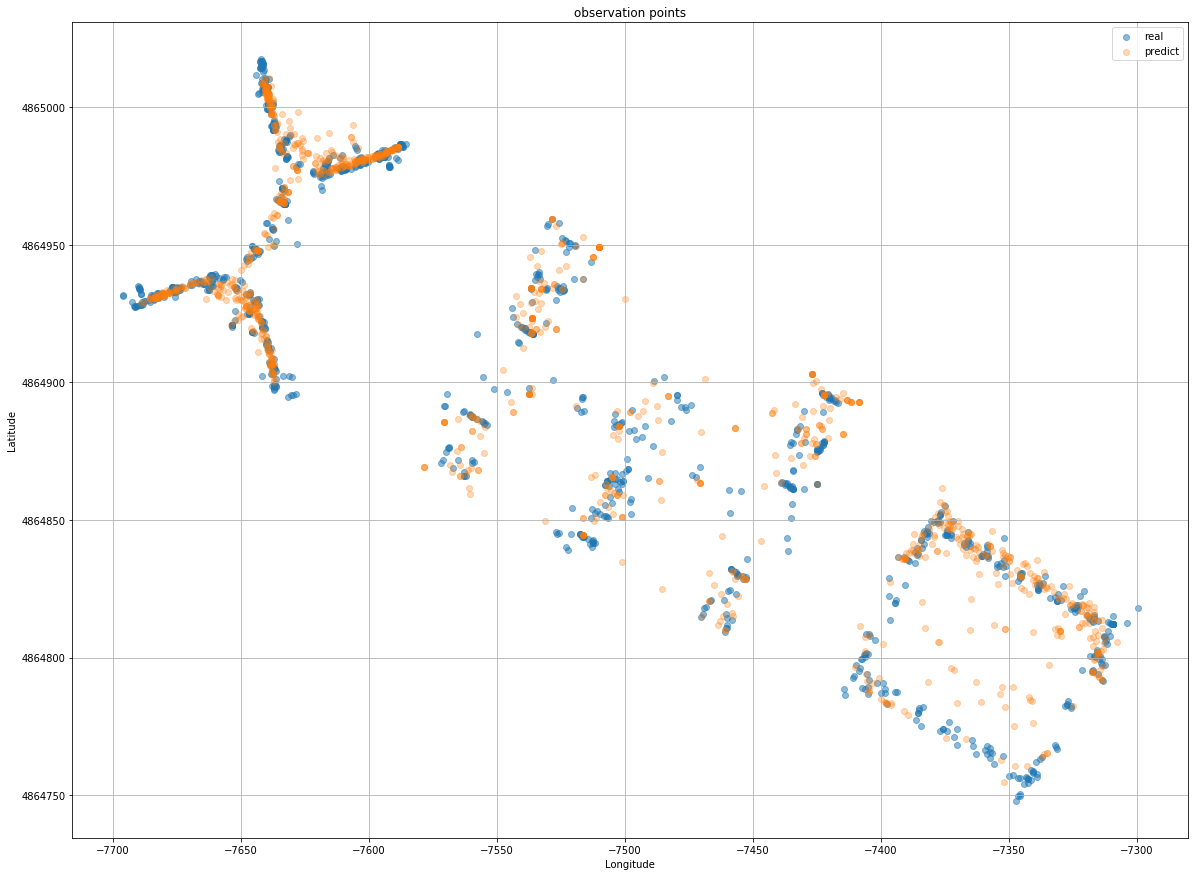

In [142]:
plt.figure(figsize=(20, 15))
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real", alpha=0.5)
plt.scatter(pd.DataFrame(predic_y)[0], pd.DataFrame(predic_y)[1], label = "predict", alpha=0.3)
plt.legend()
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
#plt.ylim(4864745.7450159714 ,4865017.3646842018)
#plt.xlim(-7695.9387549299299000, -7299.786516730871000 )
plt.show()

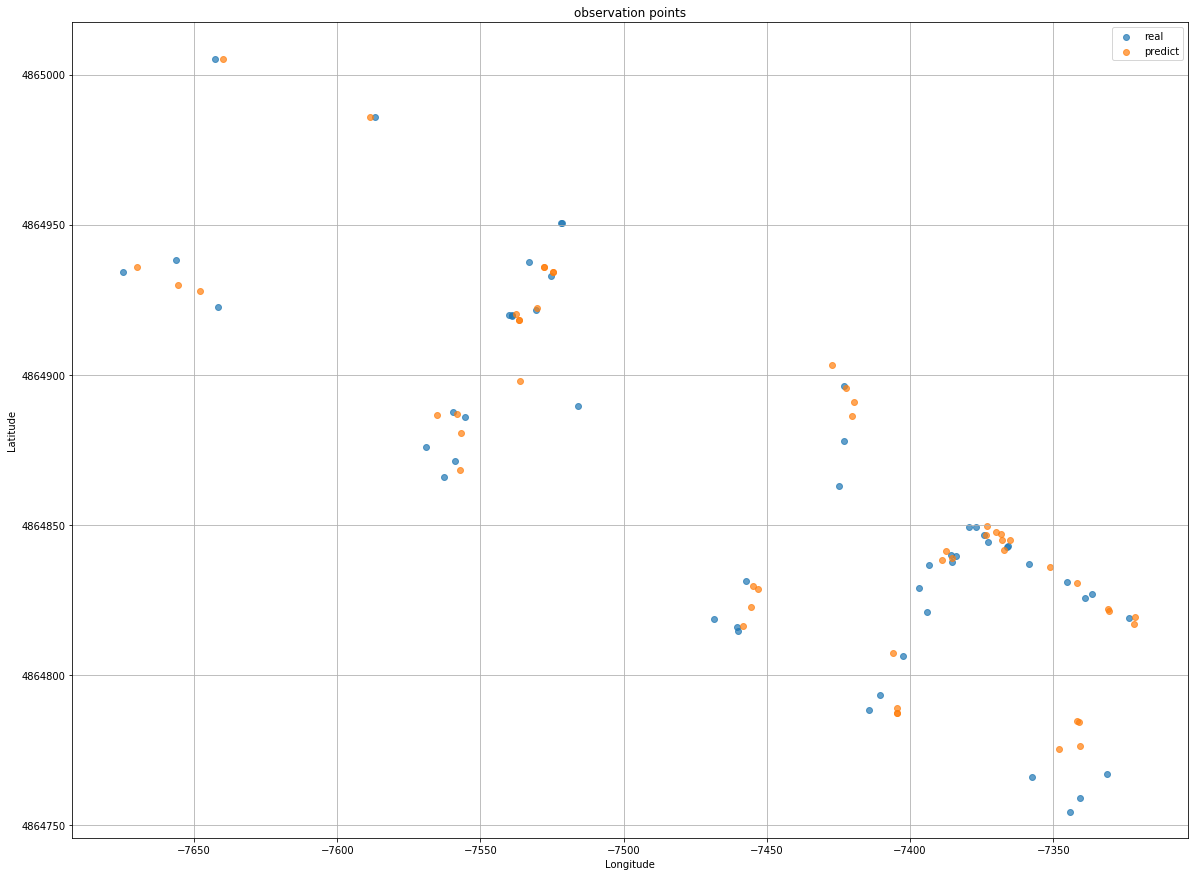

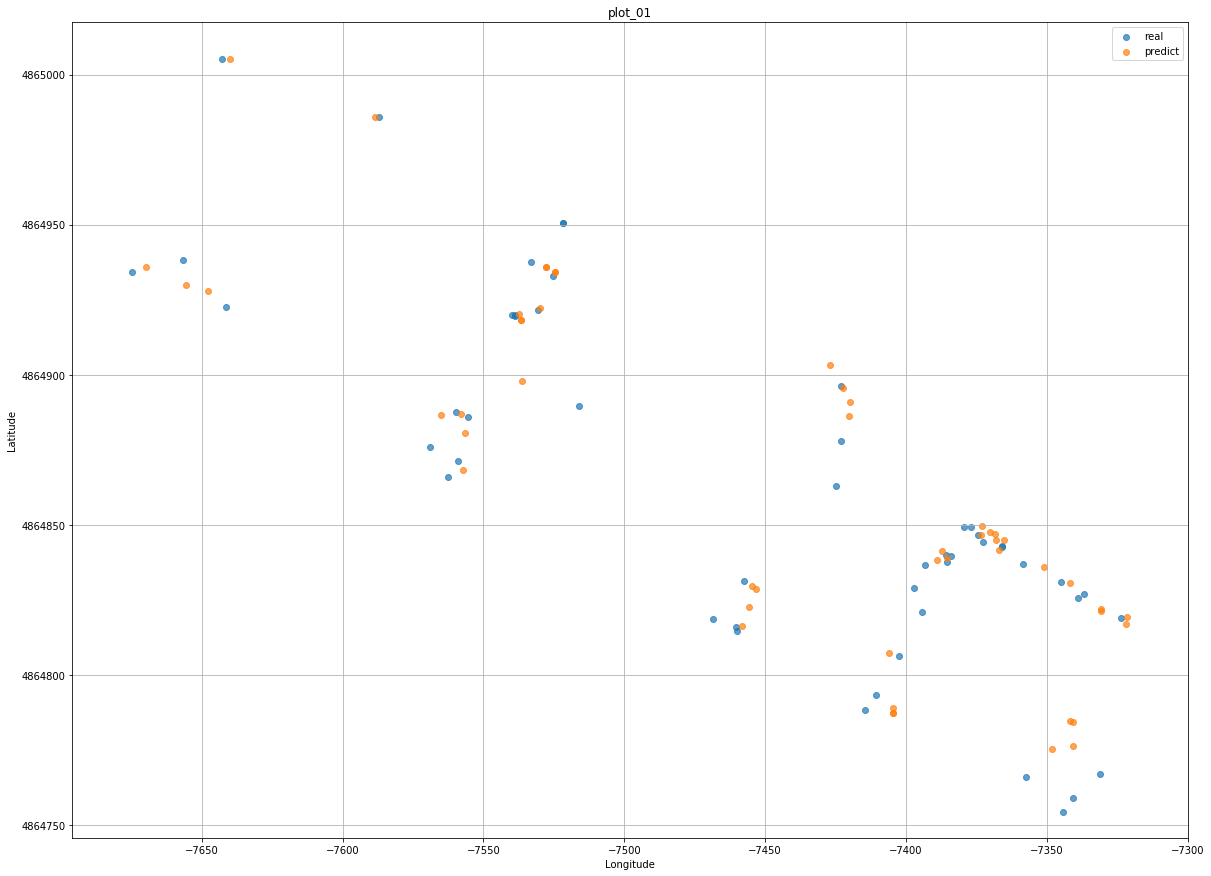

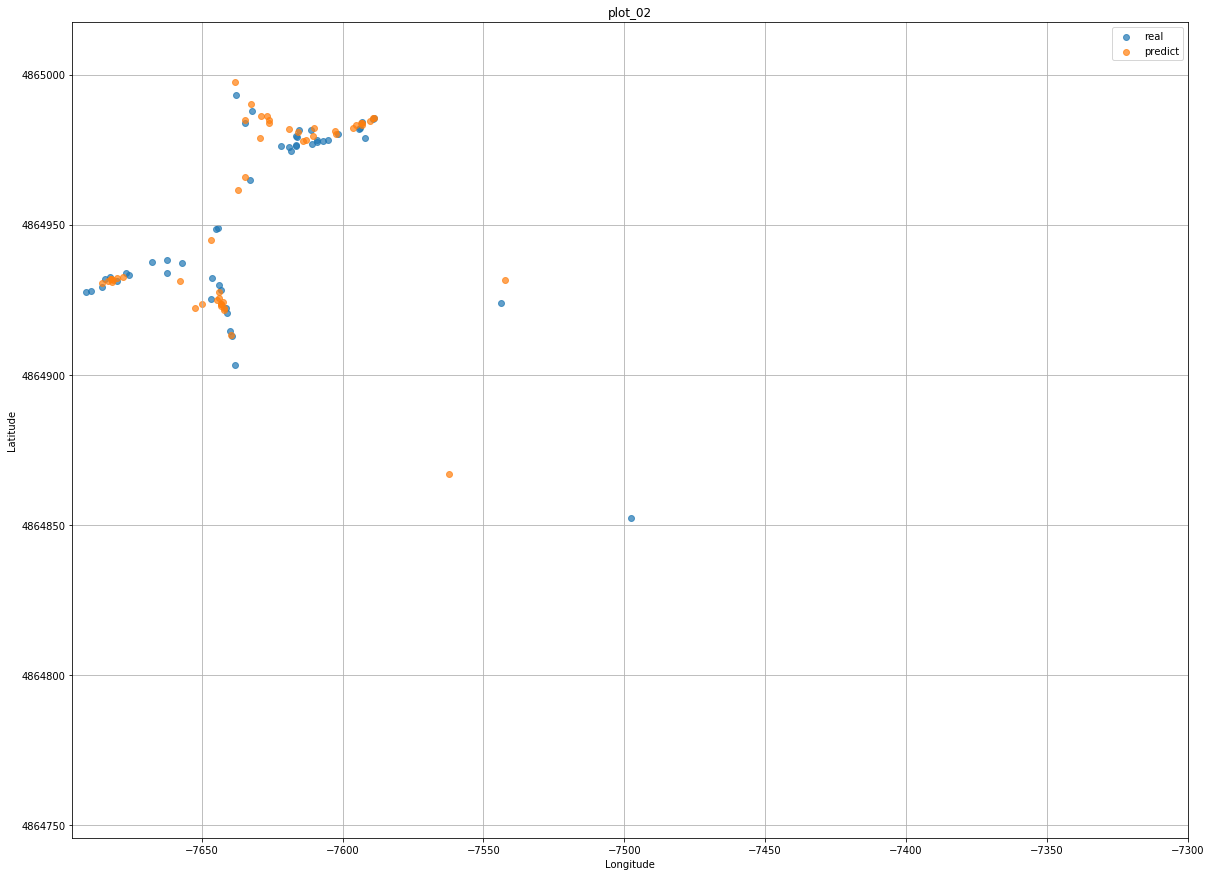

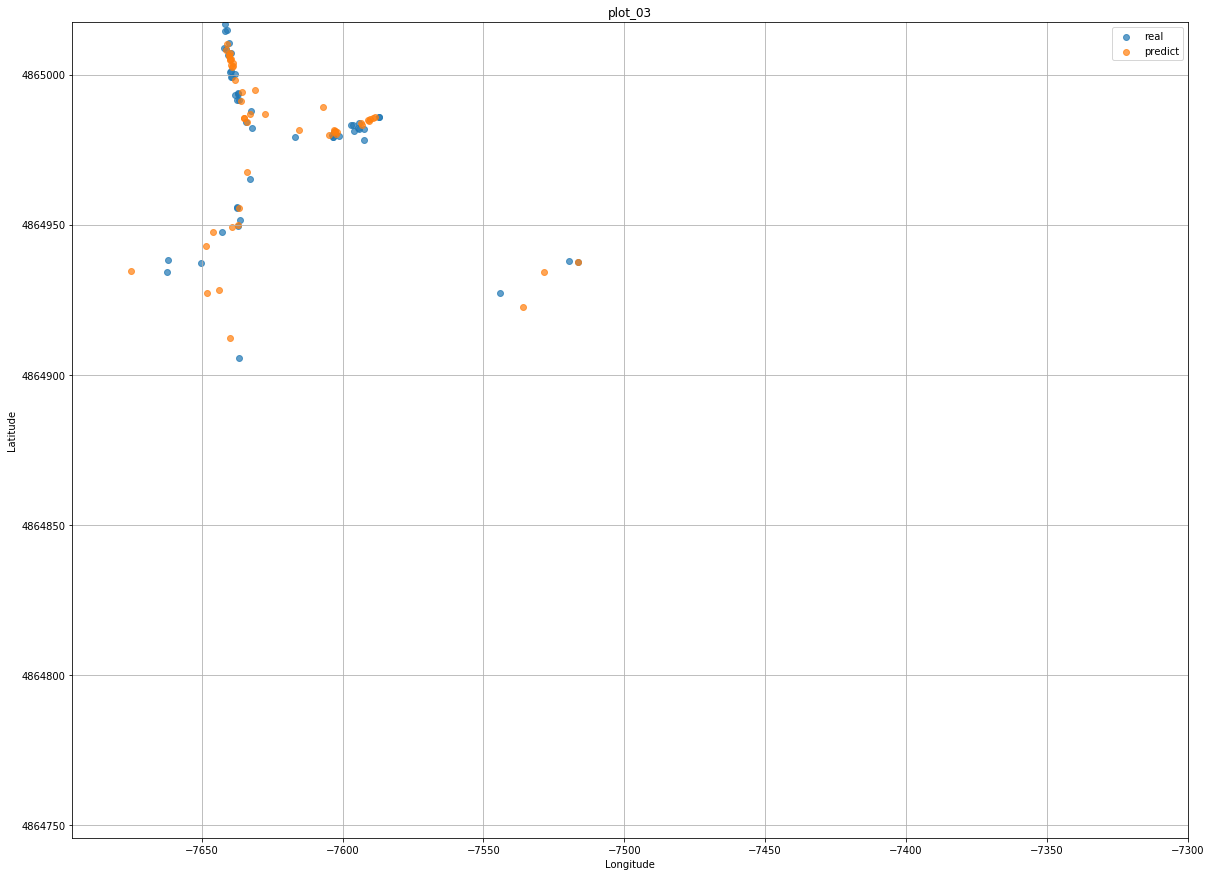

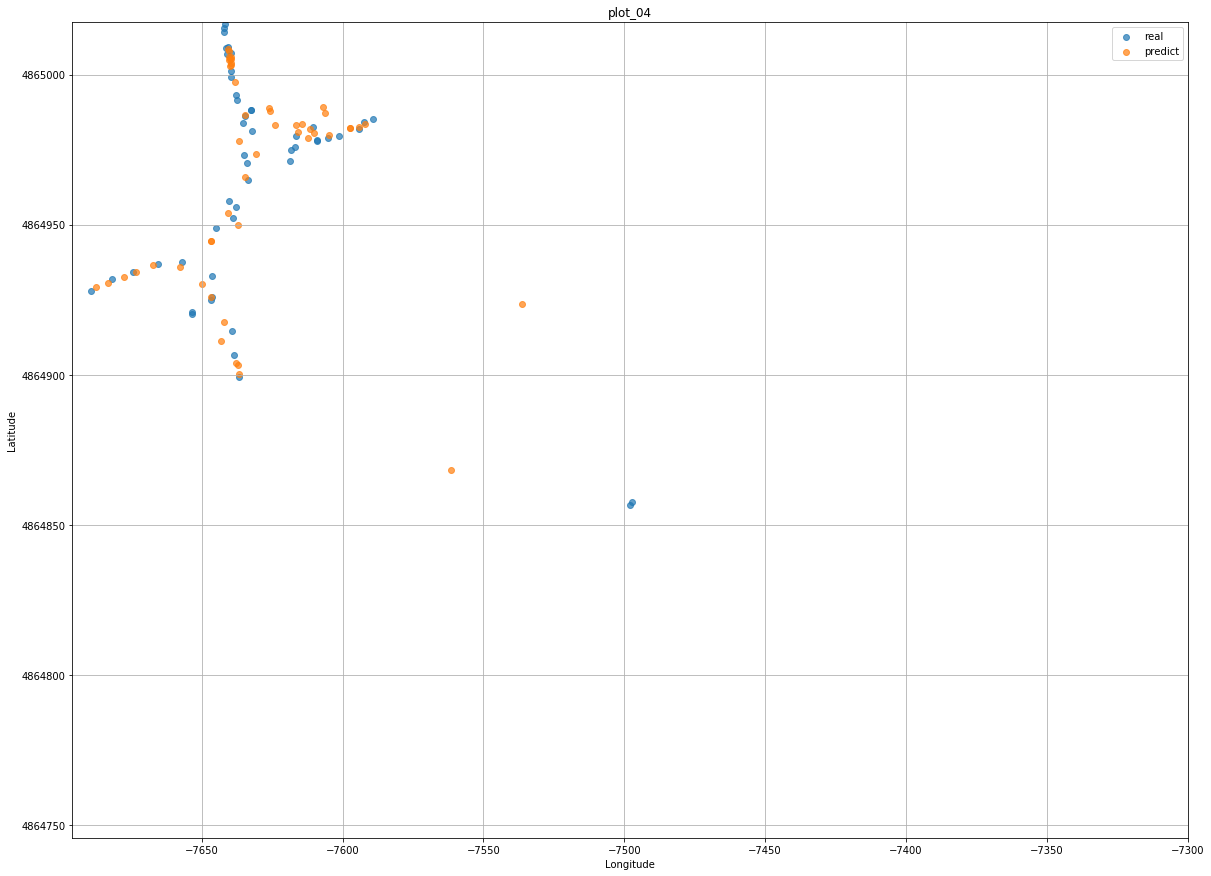

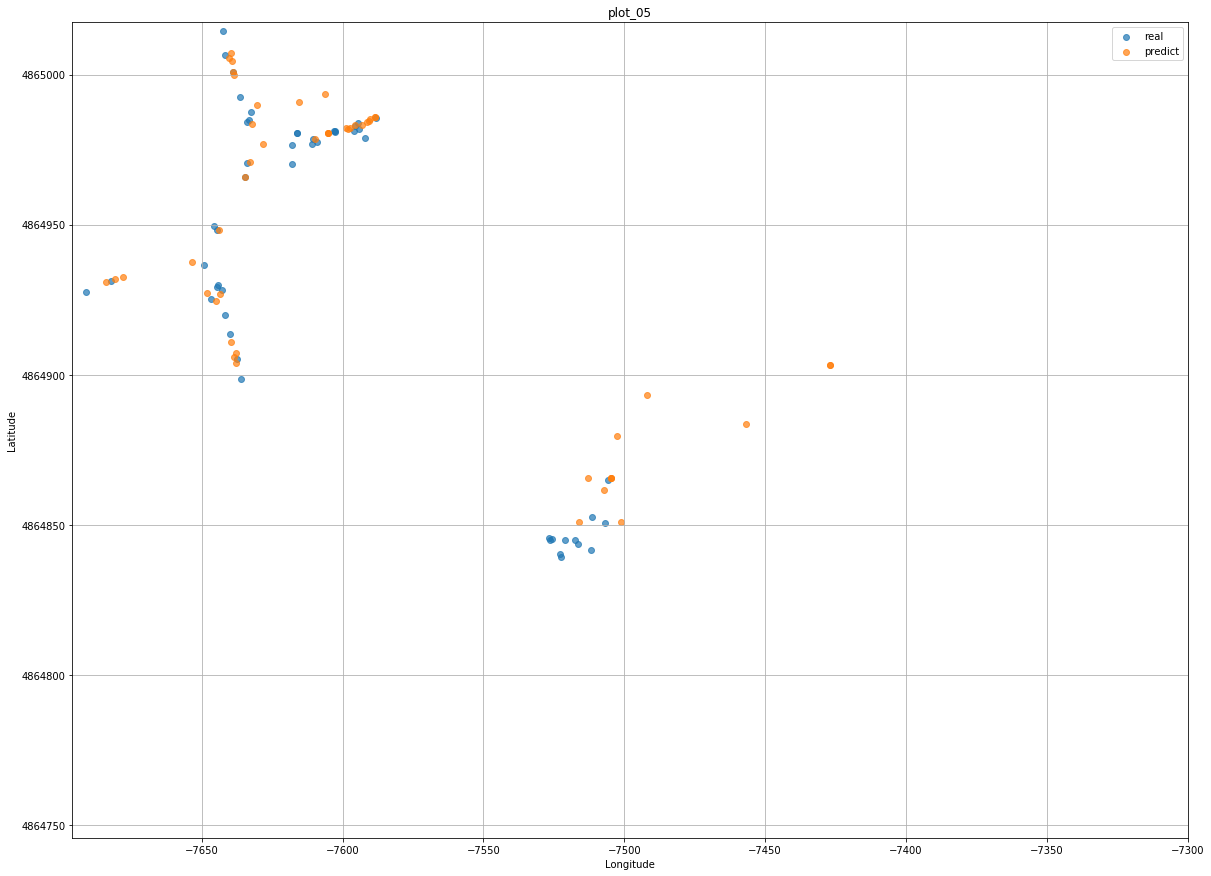

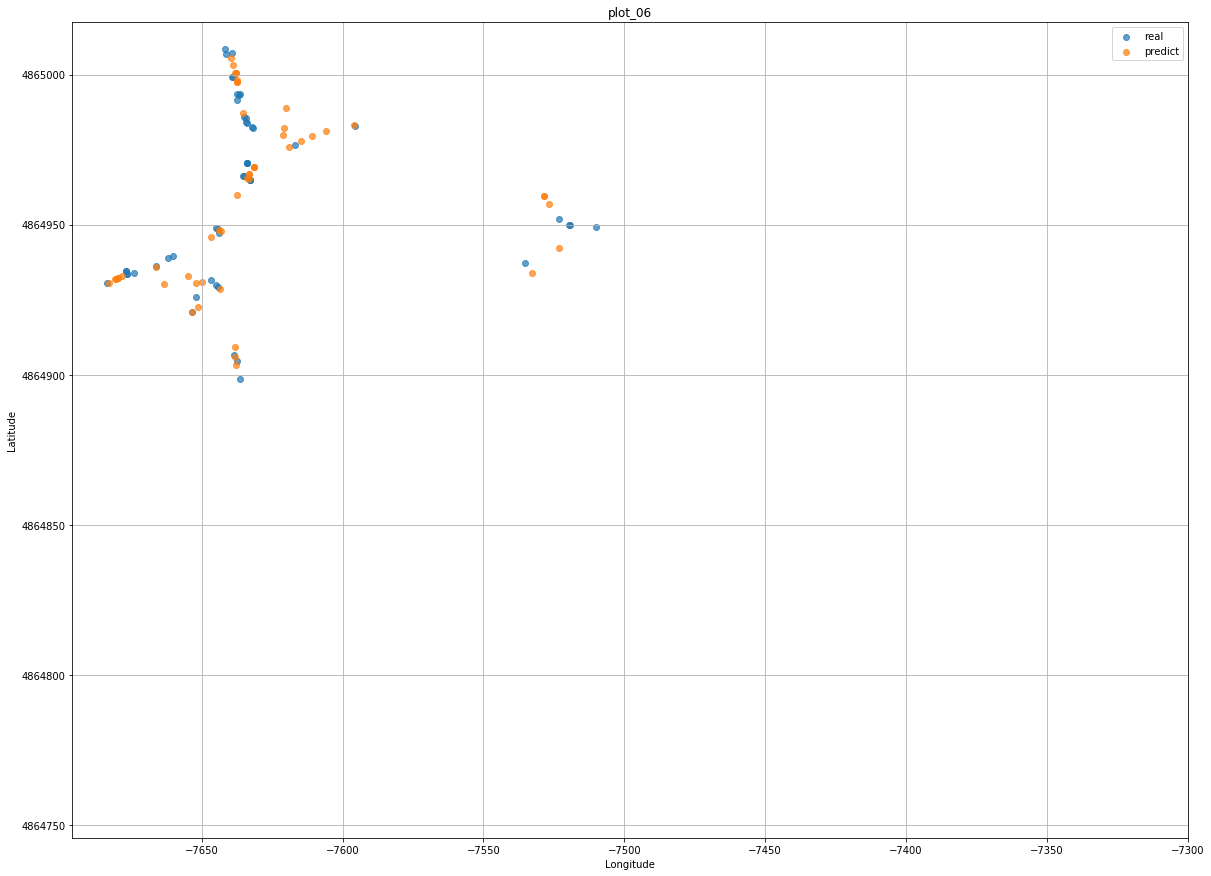

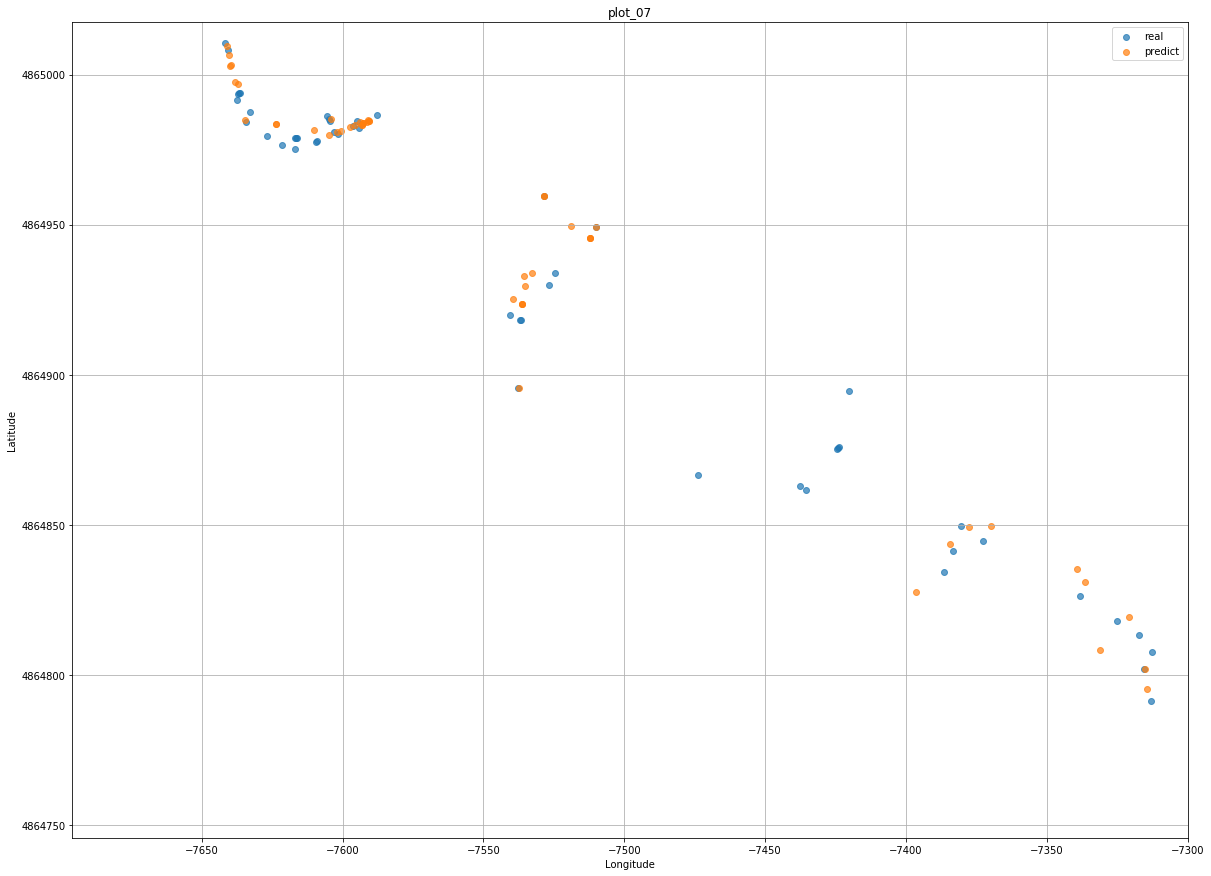

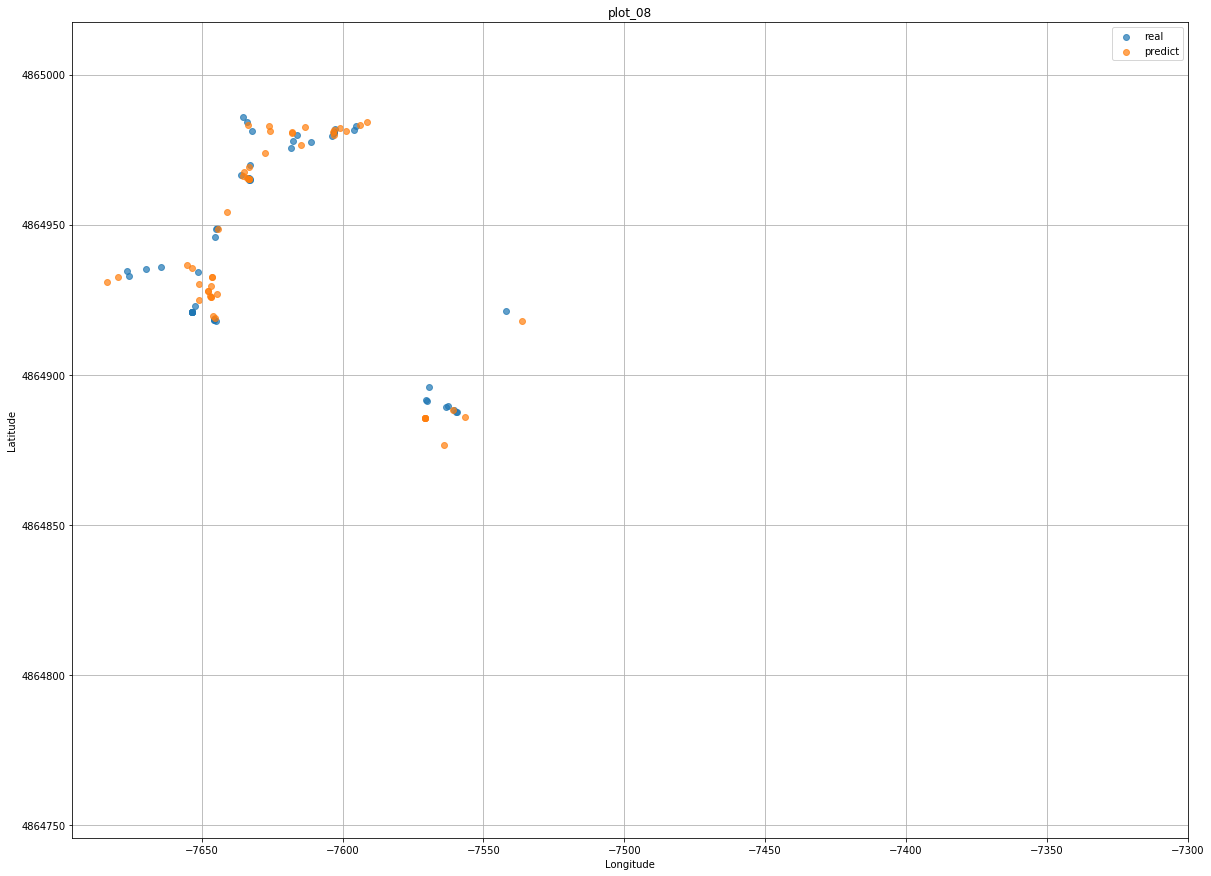

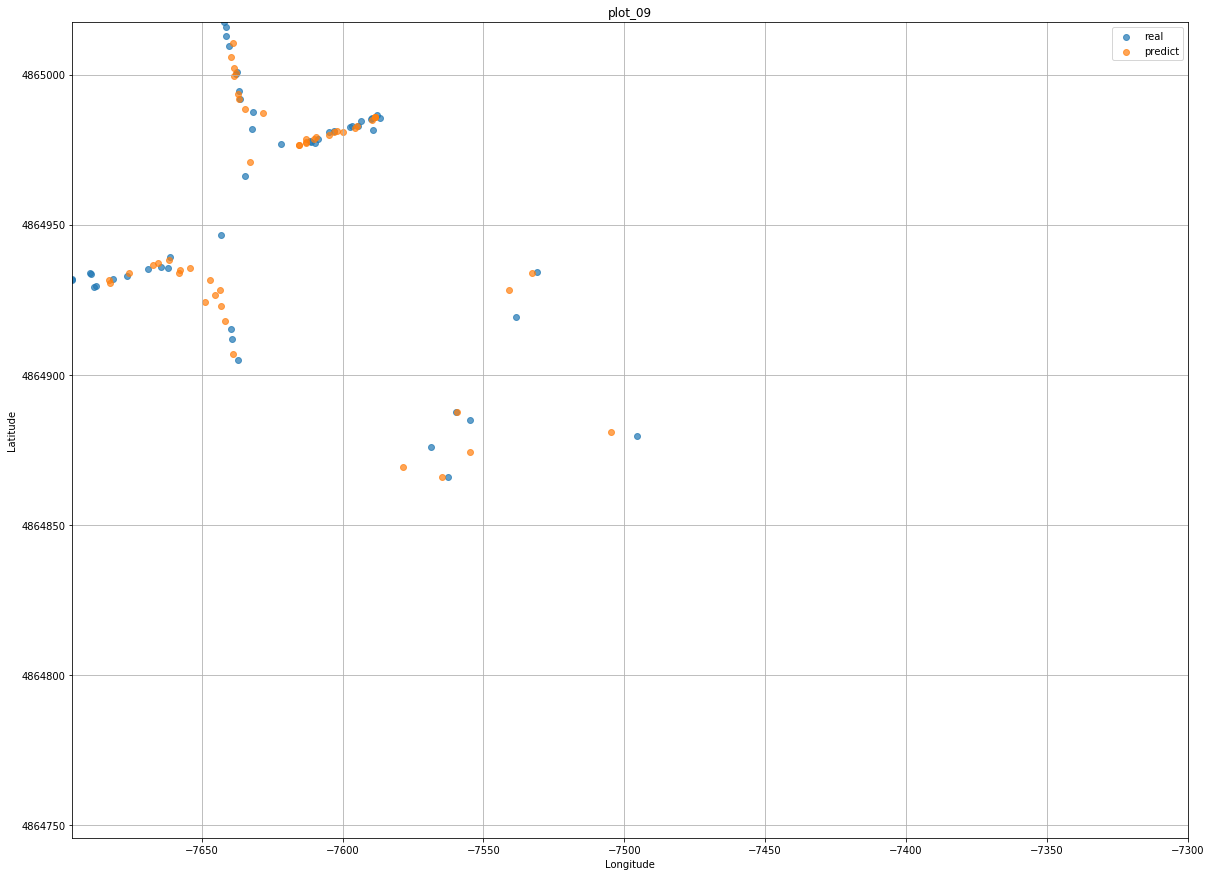

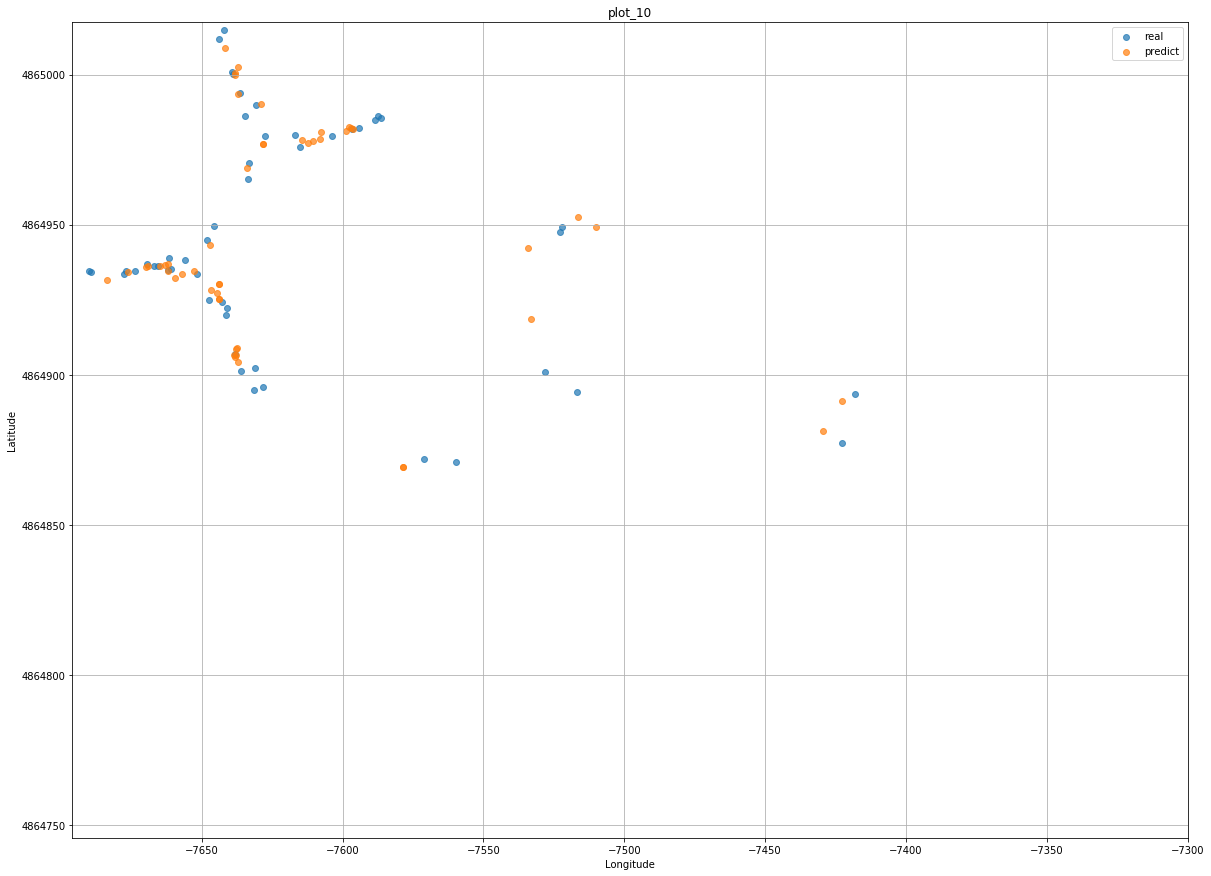

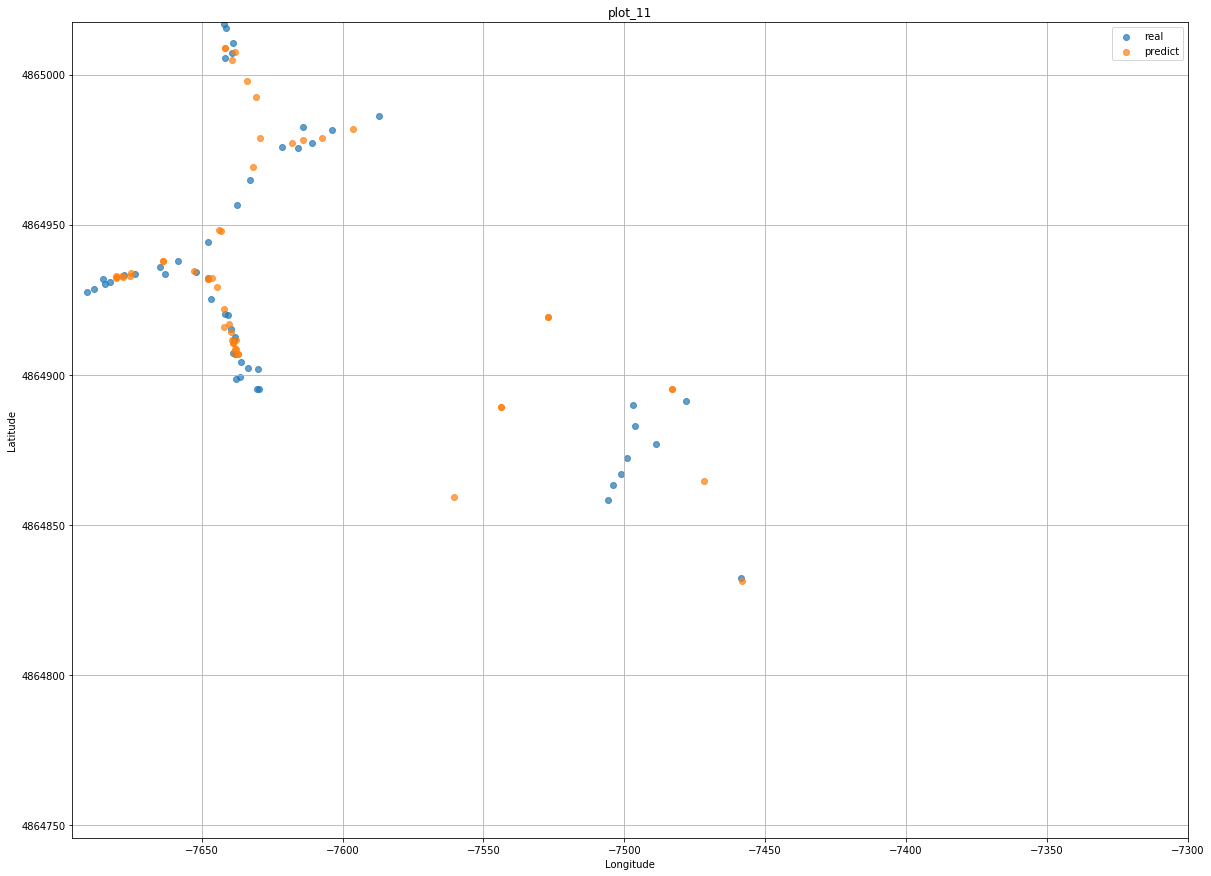

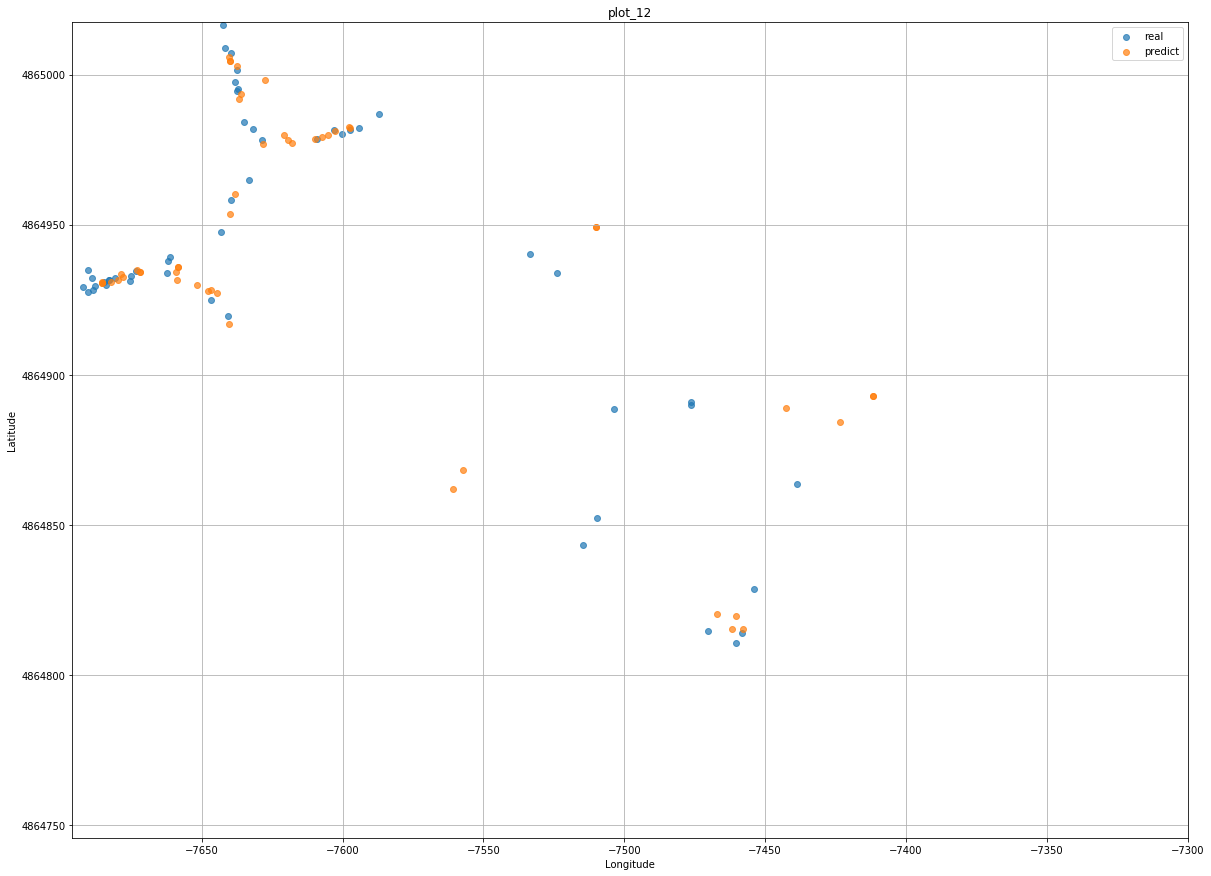

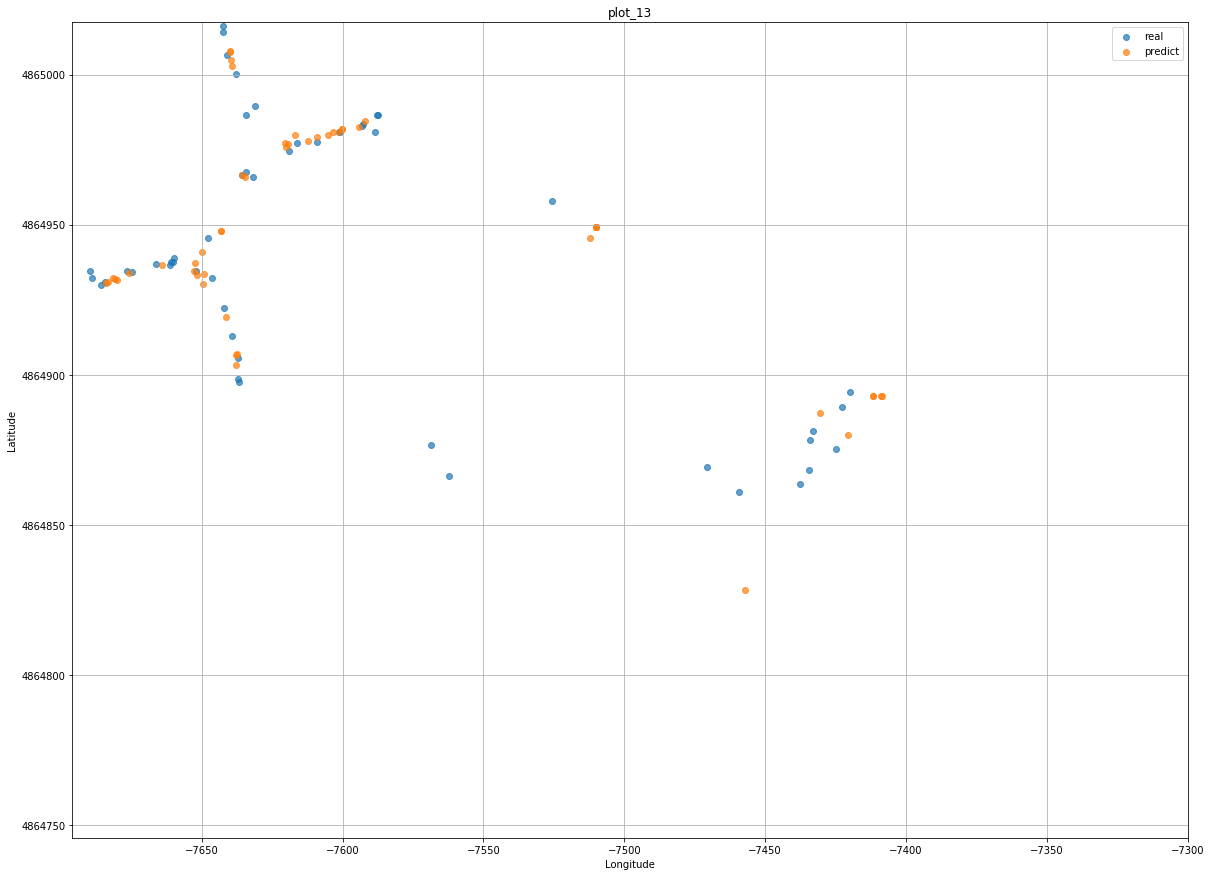

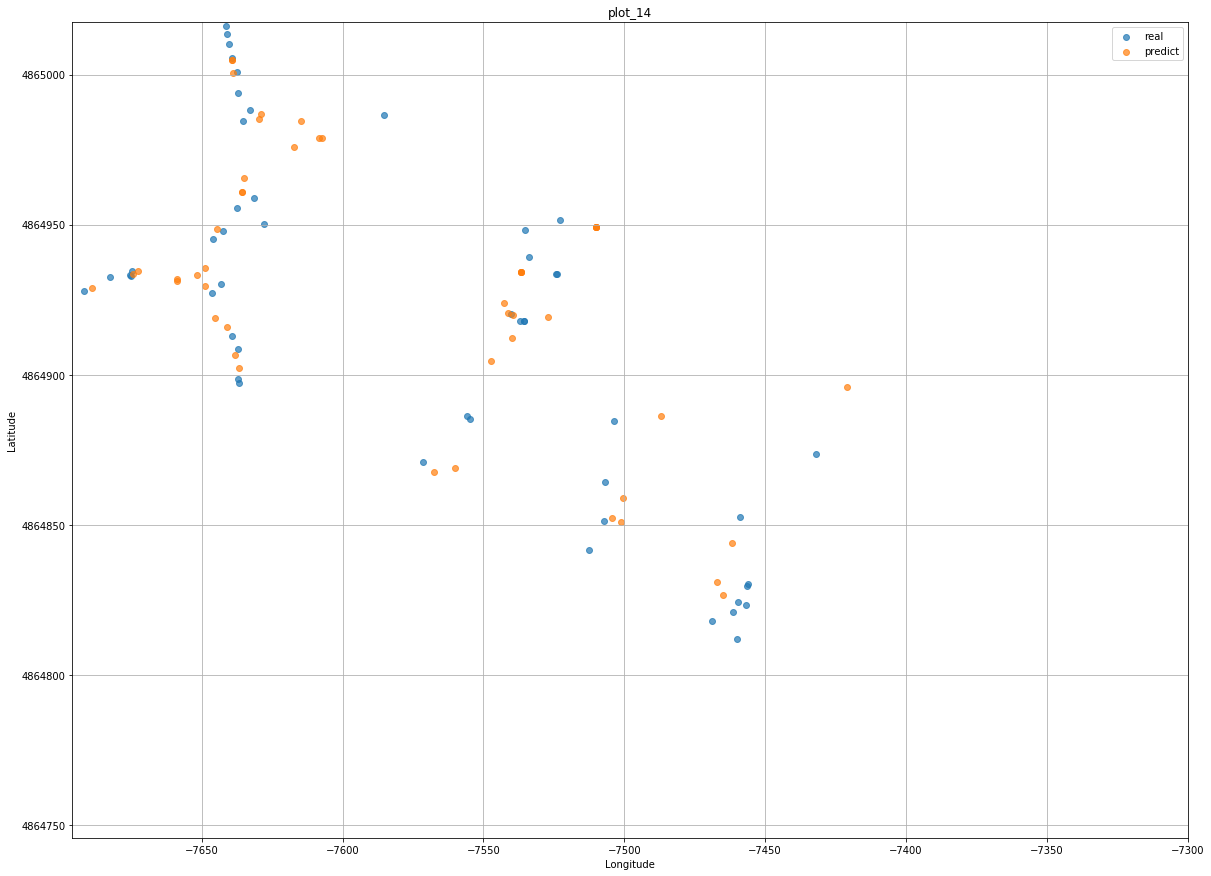

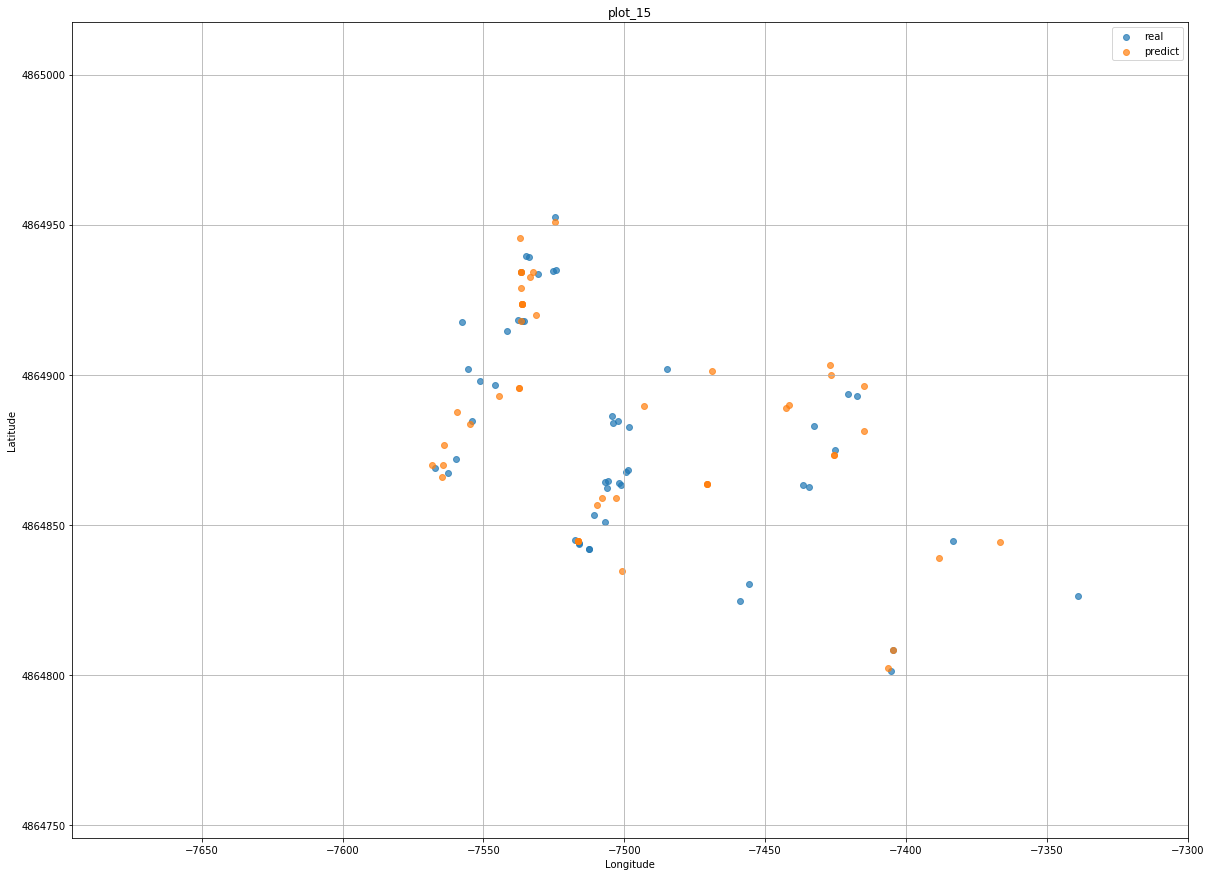

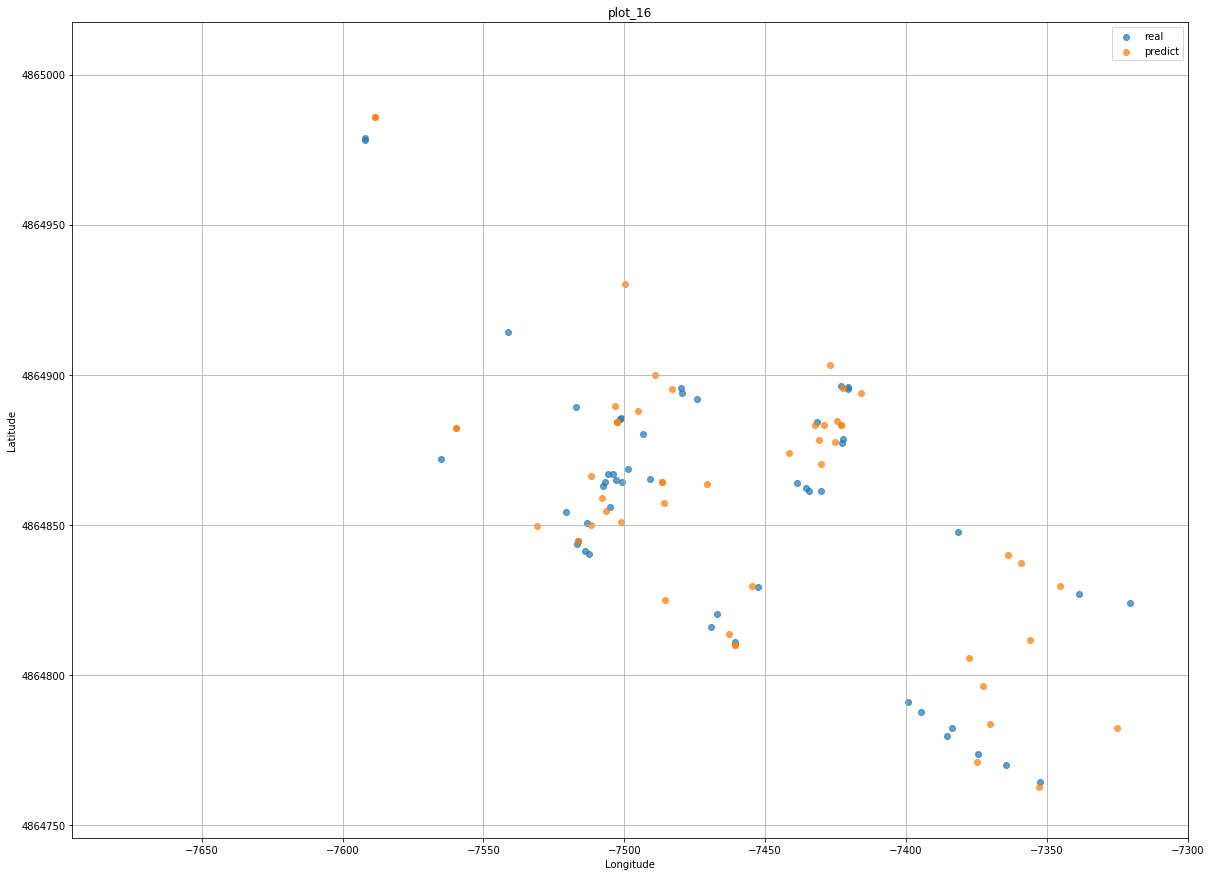

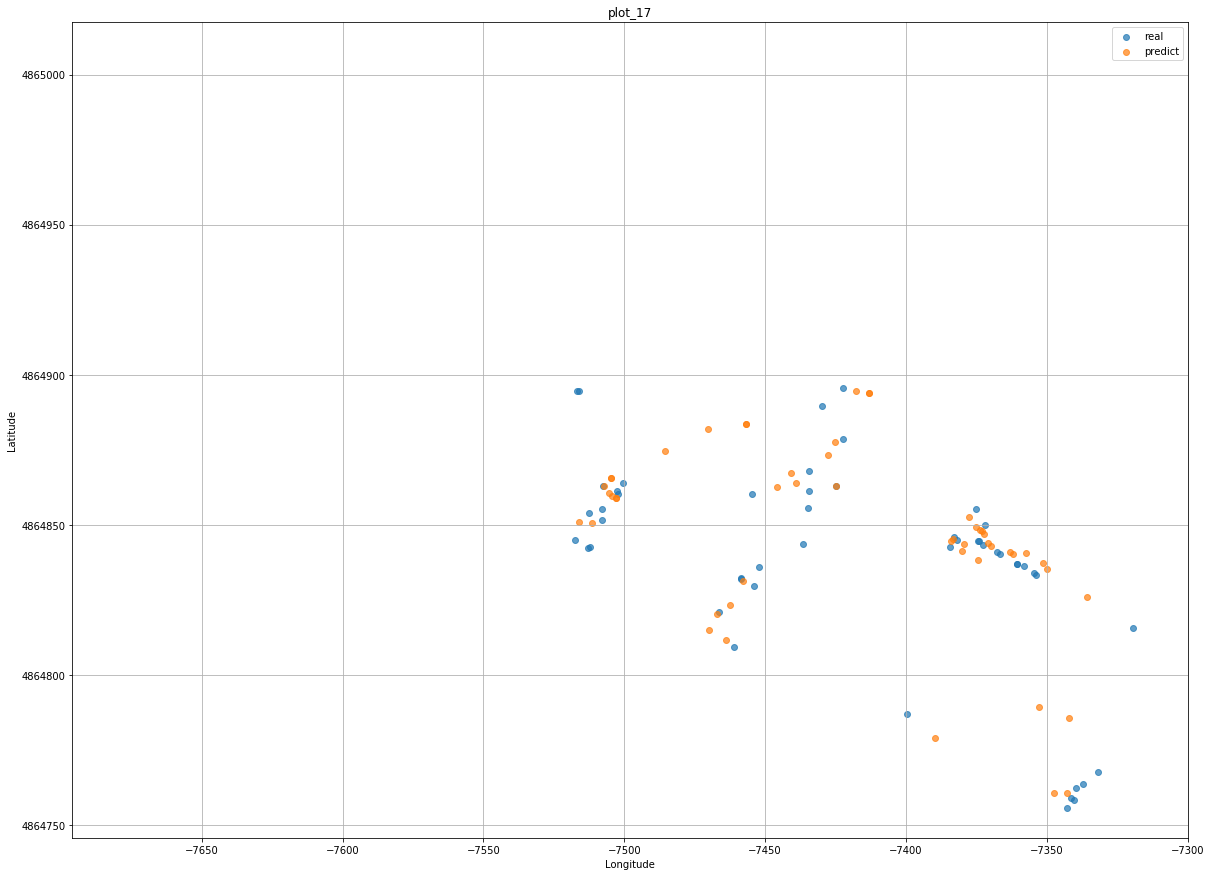

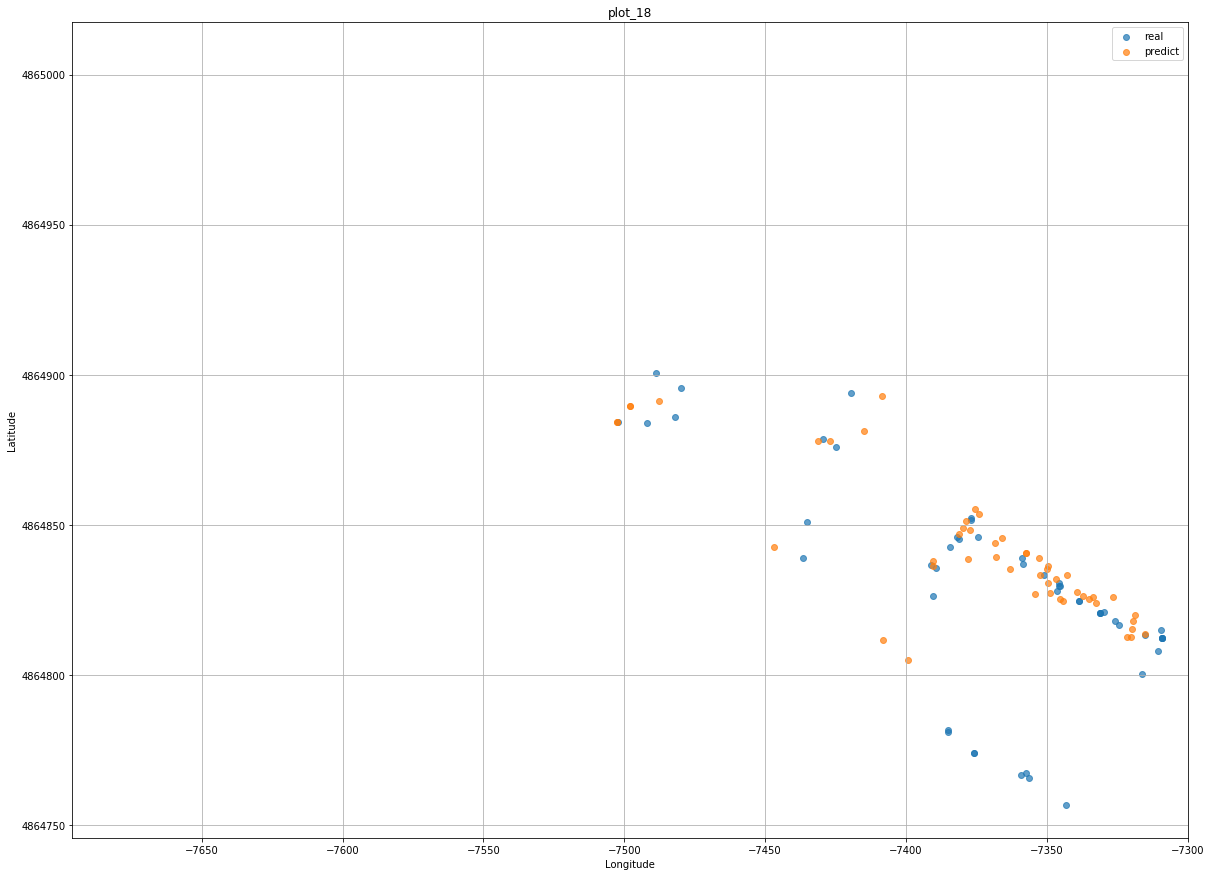

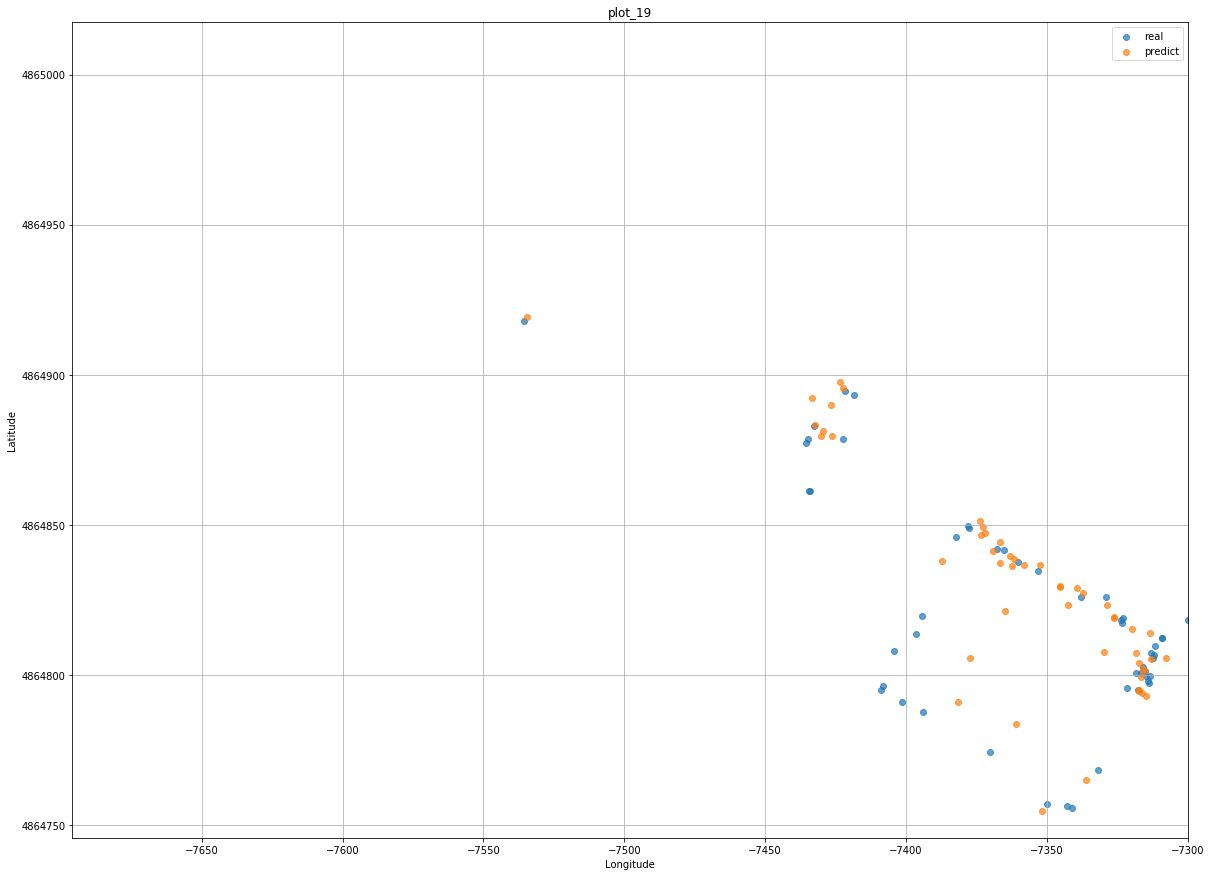

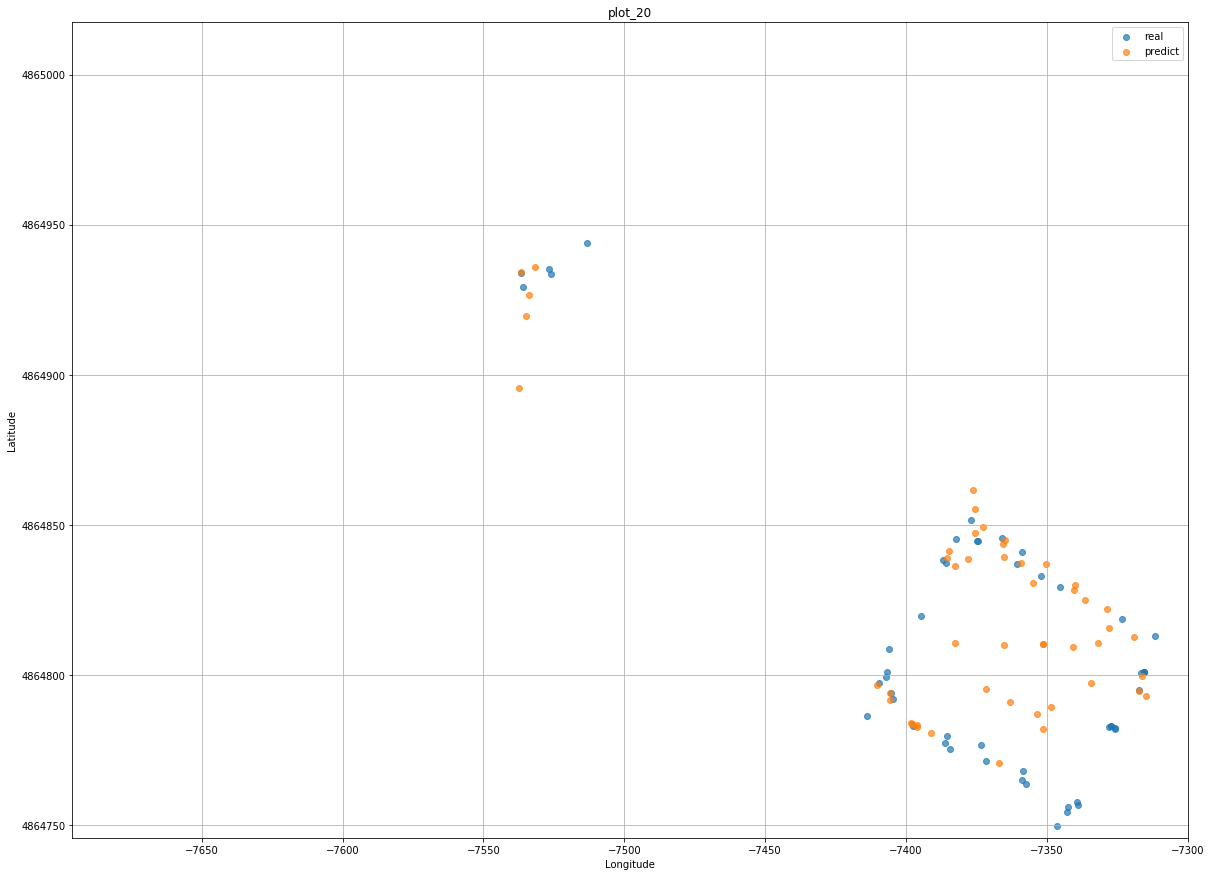

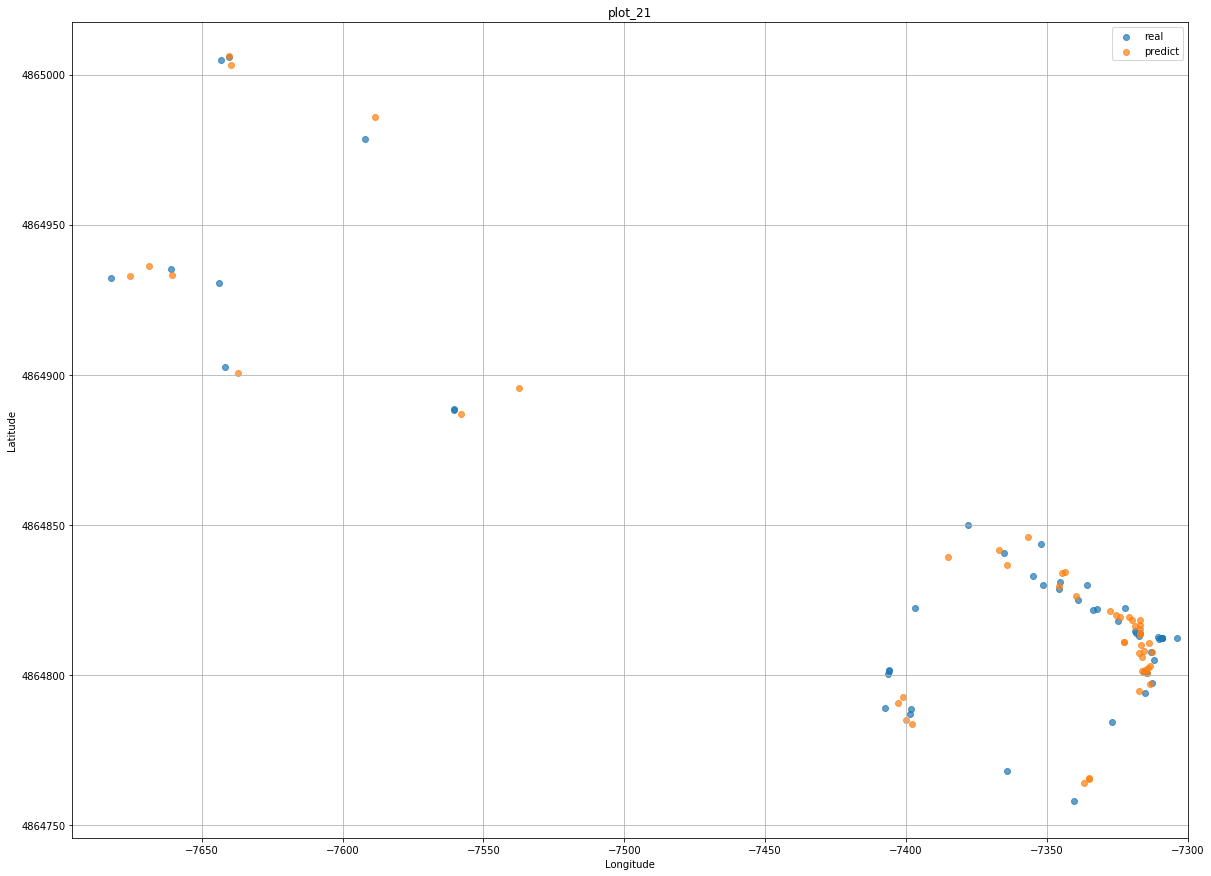

In [163]:
for i in range(1,len(raw_validation)//50):
    plt.figure(figsize=(20, 15))
    plt.scatter(raw_validation["LONGITUDE"][i*50-50:i*50], raw_validation["LATITUDE"][i*50-50:i*50], label = "real", alpha=0.7)
    plt.scatter(pd.DataFrame(predic_y)[0][i*50-50:i*50], pd.DataFrame(predic_y)[1][i*50-50:i*50], label = "predict", alpha=0.7)
    plt.legend()
    plt.grid()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("observation points")
    plt.ticklabel_format(style = "plain")
    plt.ylim(4864745.7450159714 ,4865017.3646842018)
    plt.xlim(-7695.9387549299299000, -7299.786516730871000 )
    plt.title("plot_{:02}" .format(i))
    plt.show()

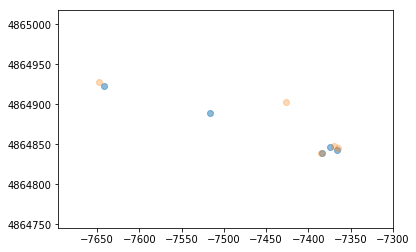

In [31]:
plt.scatter(raw_validation.iloc[:5, 520], raw_validation.iloc[:5, 521], label = "real", alpha=0.5)
plt.scatter(pd.DataFrame(predic_y).iloc[:5, 0], pd.DataFrame(predic_y).iloc[:5, 1], label = "predict", alpha=0.3)
plt.ylim(4864745.7450159714 ,4865017.3646842018)
plt.xlim(-7695.9387549299299000, -7299.786516730871000 )
plt.show()